In [1]:
using JLD2, CSV, DataFrames
using KissSmoothing
using Statistics
using Plots

In [ ]:
ndays = 10
saveat = 60.0
dt = 60 # minutes
nruns = 1070
n_species = 5946
nmete = 5
ntimestep = 24*ndays +1
startspec = 1
specname =  Array(CSV.read("specname.csv", DataFrame))[startspec:n_species,2]

5946-element Vector{Any}:
 "so4_conc_1"
 "so4_conc_2"
 "so4_conc_3"
 "no3_conc_1"
 "no3_conc_2"
 "no3_conc_3"
 "cl_conc_1"
 "cl_conc_2"
 "cl_conc_3"
 "nh4_conc_1"
 "nh4_conc_2"
 "nh4_conc_3"
 "msa_conc_1"
 ⋮
 "HOCH2CHO"
 "MEKAO2"
 "C116CHO"
 "CH3COCH2O2"
 "C3ME3CHOO2"
 "CH3CO3"
 "C1011CO3"
 "IPRHOCO3"
 "C132O2"
 "BCLKET"
 "BCAL"
 "BCKET"

In [ ]:
JLD2.@load "testing_dataset.jld" conc_test emit_test mete_test id_test

4-element Vector{Symbol}:
 :conc_test
 :emit_test
 :mete_test
 :id_test

In [4]:
discard_specname = vcat(string.(specname[1:60]),["H2SO4", "ETHP", "ANOL", "ETHOOH", "ALD2", "RCOOH", "C2O3", "ARO1", "ARO2", "ALK1", "OLE1", "API1", "API2", "LIM1", "LIM2", "PAR", "AONE", "MGLY", "ETH", "OLET", "OLEI", "TOL", "XYL", "CRES", "TO2", "CRO", "OPEN", "ONIT", "ROOH", "RO2", "ANO2", "NAP", "XO2", "XPAR", "ISOP", "ISOPRD", "ISOPP", "ISOPN", "ISOPO2", "API", "LIM", "CH3SO2H", "CH3SCH2OO", "CH3SO2OO", "CH3SO2CH2OO", "SULFHOX", "NA", "SA"])
# Get indices of s in S
indices_s = findall(x -> x in discard_specname, specname)

# Get all indices of S
all_indices = collect(1:length(specname))

# Get indices that are not in s
non_s_indices = setdiff(all_indices, indices_s)

# Output the result
#println(non_s_indices)
specname = specname[non_s_indices]

5838-element Vector{Any}:
 "HNO3"
 "HCL"
 "NH3"
 "NO"
 "NO2"
 "NO3"
 "N2O5"
 "HONO"
 "HNO4"
 "O3"
 "O1D"
 "O3P"
 "OH"
 ⋮
 "HOCH2CHO"
 "MEKAO2"
 "C116CHO"
 "CH3COCH2O2"
 "C3ME3CHOO2"
 "CH3CO3"
 "C1011CO3"
 "IPRHOCO3"
 "C132O2"
 "BCLKET"
 "BCAL"
 "BCKET"

In [5]:
ref_data = conc_test[:,:,:][non_s_indices,:,:]
#ref_mean = mean(ref_data;dims=(2,3))

5838×241×1070 Array{Float64, 3}:
[:, :, 1] =
 40.7949       40.9313       41.014        …  41.3374       41.4649
  0.828486      0.829612      0.830673         0.830866      0.831788
 11.5978       11.0144       10.4617          11.9961       11.6148
 67.7388       63.9443       60.5232          69.761        67.0795
 87.9609       86.1313       84.1209          89.2263       88.2
  3.17374e-5    3.41828e-5    3.65959e-5   …   3.06305e-5    3.22245e-5
  0.0244707     0.0257996     0.0269903        0.0239574     0.0249207
  0.262049      0.24598       0.232781         0.272064      0.255677
  0.0           0.0           0.0              0.0           0.0
 31.1815       32.4305       33.6952          30.5265       31.2757
  1.07819e-12   1.13459e-12   1.21453e-12  …   1.02829e-12   1.03863e-12
  0.0           0.0           0.0              0.0           0.0
  2.32001e-5    2.31327e-5    2.33329e-5       2.32109e-5    2.2627e-5
  ⋮                                        ⋱                 

In [ ]:

ref_emit = emit_test[:,:,:][non_s_indices,:,:]

5838×241×1070 Array{Float64, 3}:
[:, :, 1] =
 0.0          0.0          0.0          …  0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0             6.47966e-5   0.0
 0.00128375   0.00124294   0.00121022      0.00183987   0.00128375
 0.000131378  0.000127195  0.000123848     0.000188273  0.000131378
 0.0          0.0          0.0          …  0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0          …  0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0             0.0          0.0
 ⋮                                      ⋱               ⋮
 0.0          0.0          0.0             0.0          0.0
 0.0          0.0          0.0            

In [7]:
conc_test = nothing
emit_test = nothing
GC.gc()

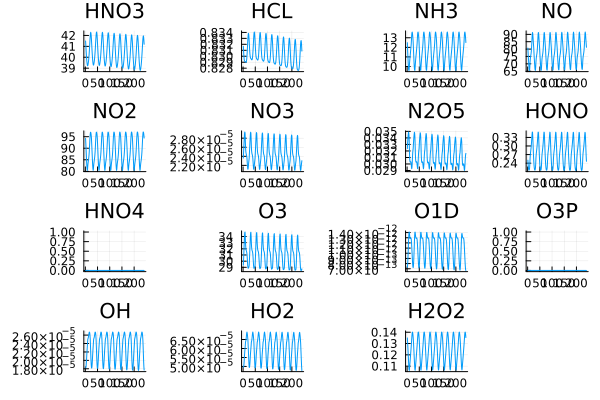

In [8]:
begin
plots = []
i_case = 9
for i in 1:15
    p = plot(ref_data[i,:,i_case], title = specname[i], legend = :none )
    push!(plots,p)
end
plot(plots...)
end

In [9]:
ref_data[ref_data.< 0.0] .= 0.0

257870-element view(::Vector{Float64}, [74, 5912, 11750, 17588, 23426, 29264, 35102, 40940, 46778, 52616  …  1505386754, 1505392592, 1505398430, 1505404268, 1505410106, 1505415944, 1505421782, 1505427620, 1505433458, 1505439296]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:

ref_params = mete_test[:,1:ntimestep,:]

5×241×1070 Array{Float64, 3}:
[:, :, 1] =
 -57.44     -57.44     -57.44     …  -57.44     -57.44     -57.44
 279.698    279.698    279.698       279.698    279.698    279.698
  61.41      61.41      61.41         61.41      61.41      61.41
   1.87093    1.85241    1.79878       1.85365    1.90884    1.92786
   1.07978    1.07978    1.07978       1.07978    1.07978    1.07978

[:, :, 2] =
 -24.16     -24.16     -24.16     …  -24.16     -24.16     -24.16
 292.035    292.035    292.035       292.035    292.035    292.035
  98.9       98.9       98.9          98.9       98.9       98.9
   2.6154     2.55562    2.40674       2.36079    2.4974     2.54917
   1.01203    1.01203    1.01203       1.01203    1.01203    1.01203

[:, :, 3] =
 -56.3       -56.3       -56.3       …  -56.3       -56.3       -56.3
 276.808     276.808     276.808        276.808     276.808     276.808
  78.28       78.28       78.28          78.28       78.28       78.28
   1.87019     1.85119     1.79624        1.84

In [11]:

timelength = 60 * (ndays * 24) # minutes
times = LinRange(0, timelength, ntimestep)
#times = LinRange(0 , timelength, Int((timelength) / dt) + 1)
tspan = (times[1], times[end])

(0.0, 14400.0)

In [12]:
ref_data_test = ref_data
ref_emit_test = ref_emit
ref_params_test = ref_params

5×241×1070 Array{Float64, 3}:
[:, :, 1] =
 -57.44     -57.44     -57.44     …  -57.44     -57.44     -57.44
 279.698    279.698    279.698       279.698    279.698    279.698
  61.41      61.41      61.41         61.41      61.41      61.41
   1.87093    1.85241    1.79878       1.85365    1.90884    1.92786
   1.07978    1.07978    1.07978       1.07978    1.07978    1.07978

[:, :, 2] =
 -24.16     -24.16     -24.16     …  -24.16     -24.16     -24.16
 292.035    292.035    292.035       292.035    292.035    292.035
  98.9       98.9       98.9          98.9       98.9       98.9
   2.6154     2.55562    2.40674       2.36079    2.4974     2.54917
   1.01203    1.01203    1.01203       1.01203    1.01203    1.01203

[:, :, 3] =
 -56.3       -56.3       -56.3       …  -56.3       -56.3       -56.3
 276.808     276.808     276.808        276.808     276.808     276.808
  78.28       78.28       78.28          78.28       78.28       78.28
   1.87019     1.85119     1.79624        1.84

In [13]:
JLD2.jldsave("testing_set.jld"; ref_data_test, ref_emit_test, ref_params_test, specname)